# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [310]:
print("Чтобы была воспроизводимость")

Чтобы была воспроизводимость


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [311]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [312]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [313]:
pd.concat([df_train.iloc[:5], df_train.iloc[-5:]])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [314]:
# your code here
print("train")
df_train.describe()

train


,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [315]:
print("train category")
df_train.describe(include="object")

train category


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [316]:
print("test")
df_test.describe()

test


,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [317]:
print("test")
df_test.describe(include="object")

test


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [318]:
# your code here
df_train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

В датасете есть пропуски в следующий колонках: mileage, engine, max_power, torque, seats

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [319]:
# your code here
X = df_train.drop(columns=["selling_price"])
print(f"Количество дубликатов - {X.duplicated(keep=False).sum()}")

Количество дубликатов - 1799


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [320]:
# your code here
X.loc[X.duplicated(keep="first")]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [321]:
# your code here
X.drop_duplicates(keep="first", inplace=True)
idx = X.index

In [322]:
df_train = df_train.loc[idx]

In [323]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [324]:
# your code here
df_train.index = list(range(len(df_train)))

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [325]:
# your code here
get_val_func = lambda x: 0.0 if str(x).split(" ")[0] == "" else float(str(x).split(" ")[0])
# mileage_func = lambda x: 0.0 if str(x).split(" ")[0] == "" else float(str(x).split(" ")[0])
# engine_func = lambda x: 0.0 if str(x).split(" ")[0] == "" else float(str(x).split(" ")[0])
# max_power_func = lambda x: 0.0 if str(x).split(" ")[0] == "" else float(str(x).split(" ")[0])

def preproc_func(df: pd.DataFrame) -> pd.DataFrame:
    df["mileage"] = df.mileage.apply(get_val_func)
    df["engine"] = df.engine.apply(get_val_func)
    df["max_power"] = df.max_power.apply(get_val_func)
    df.drop(columns=["torque"], inplace=True)

    return df


df_train = preproc_func(df_train)
df_test = preproc_func(df_test)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [326]:
# your code here
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          186
engine           186
max_power        183
seats            186
dtype: int64

In [327]:
mileage_m = df_train.mileage.median()
engine_m = df_train.engine.median()
max_power_m = df_train.max_power.median()
seats_m = df_train.seats.median()

df_train["mileage"].fillna(mileage_m, inplace=True)
df_train["engine"].fillna(engine_m, inplace=True)
df_train["max_power"].fillna(max_power_m, inplace=True)
df_train["seats"].fillna(seats_m, inplace=True)
df_test["mileage"].fillna(mileage_m, inplace=True)
df_test["engine"].fillna(engine_m, inplace=True)
df_test["max_power"].fillna(max_power_m, inplace=True)
df_test["seats"].fillna(seats_m, inplace=True);

In [328]:
df_train.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [329]:
df_test.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [330]:
df_train.seats.value_counts()

seats
5.0     4618
7.0      800
8.0      191
4.0       94
9.0       68
6.0       48
10.0      18
2.0        2
14.0       1
Name: count, dtype: int64

In [331]:
df_test.seats.value_counts()

seats
5.0    777
7.0    161
4.0     24
8.0     23
6.0      8
9.0      7
Name: count, dtype: int64

In [332]:
print("У seats всего 9 возможных значений")

У seats всего 9 возможных значений


In [333]:
# your code here
df_train.engine = df_train.engine.astype(int)
df_train.seats = df_train.seats.astype(int)
df_test.engine = df_test.engine.astype(int)
df_test.seats = df_test.seats.astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

In [334]:
num_features = df_train.describe().columns.to_list()

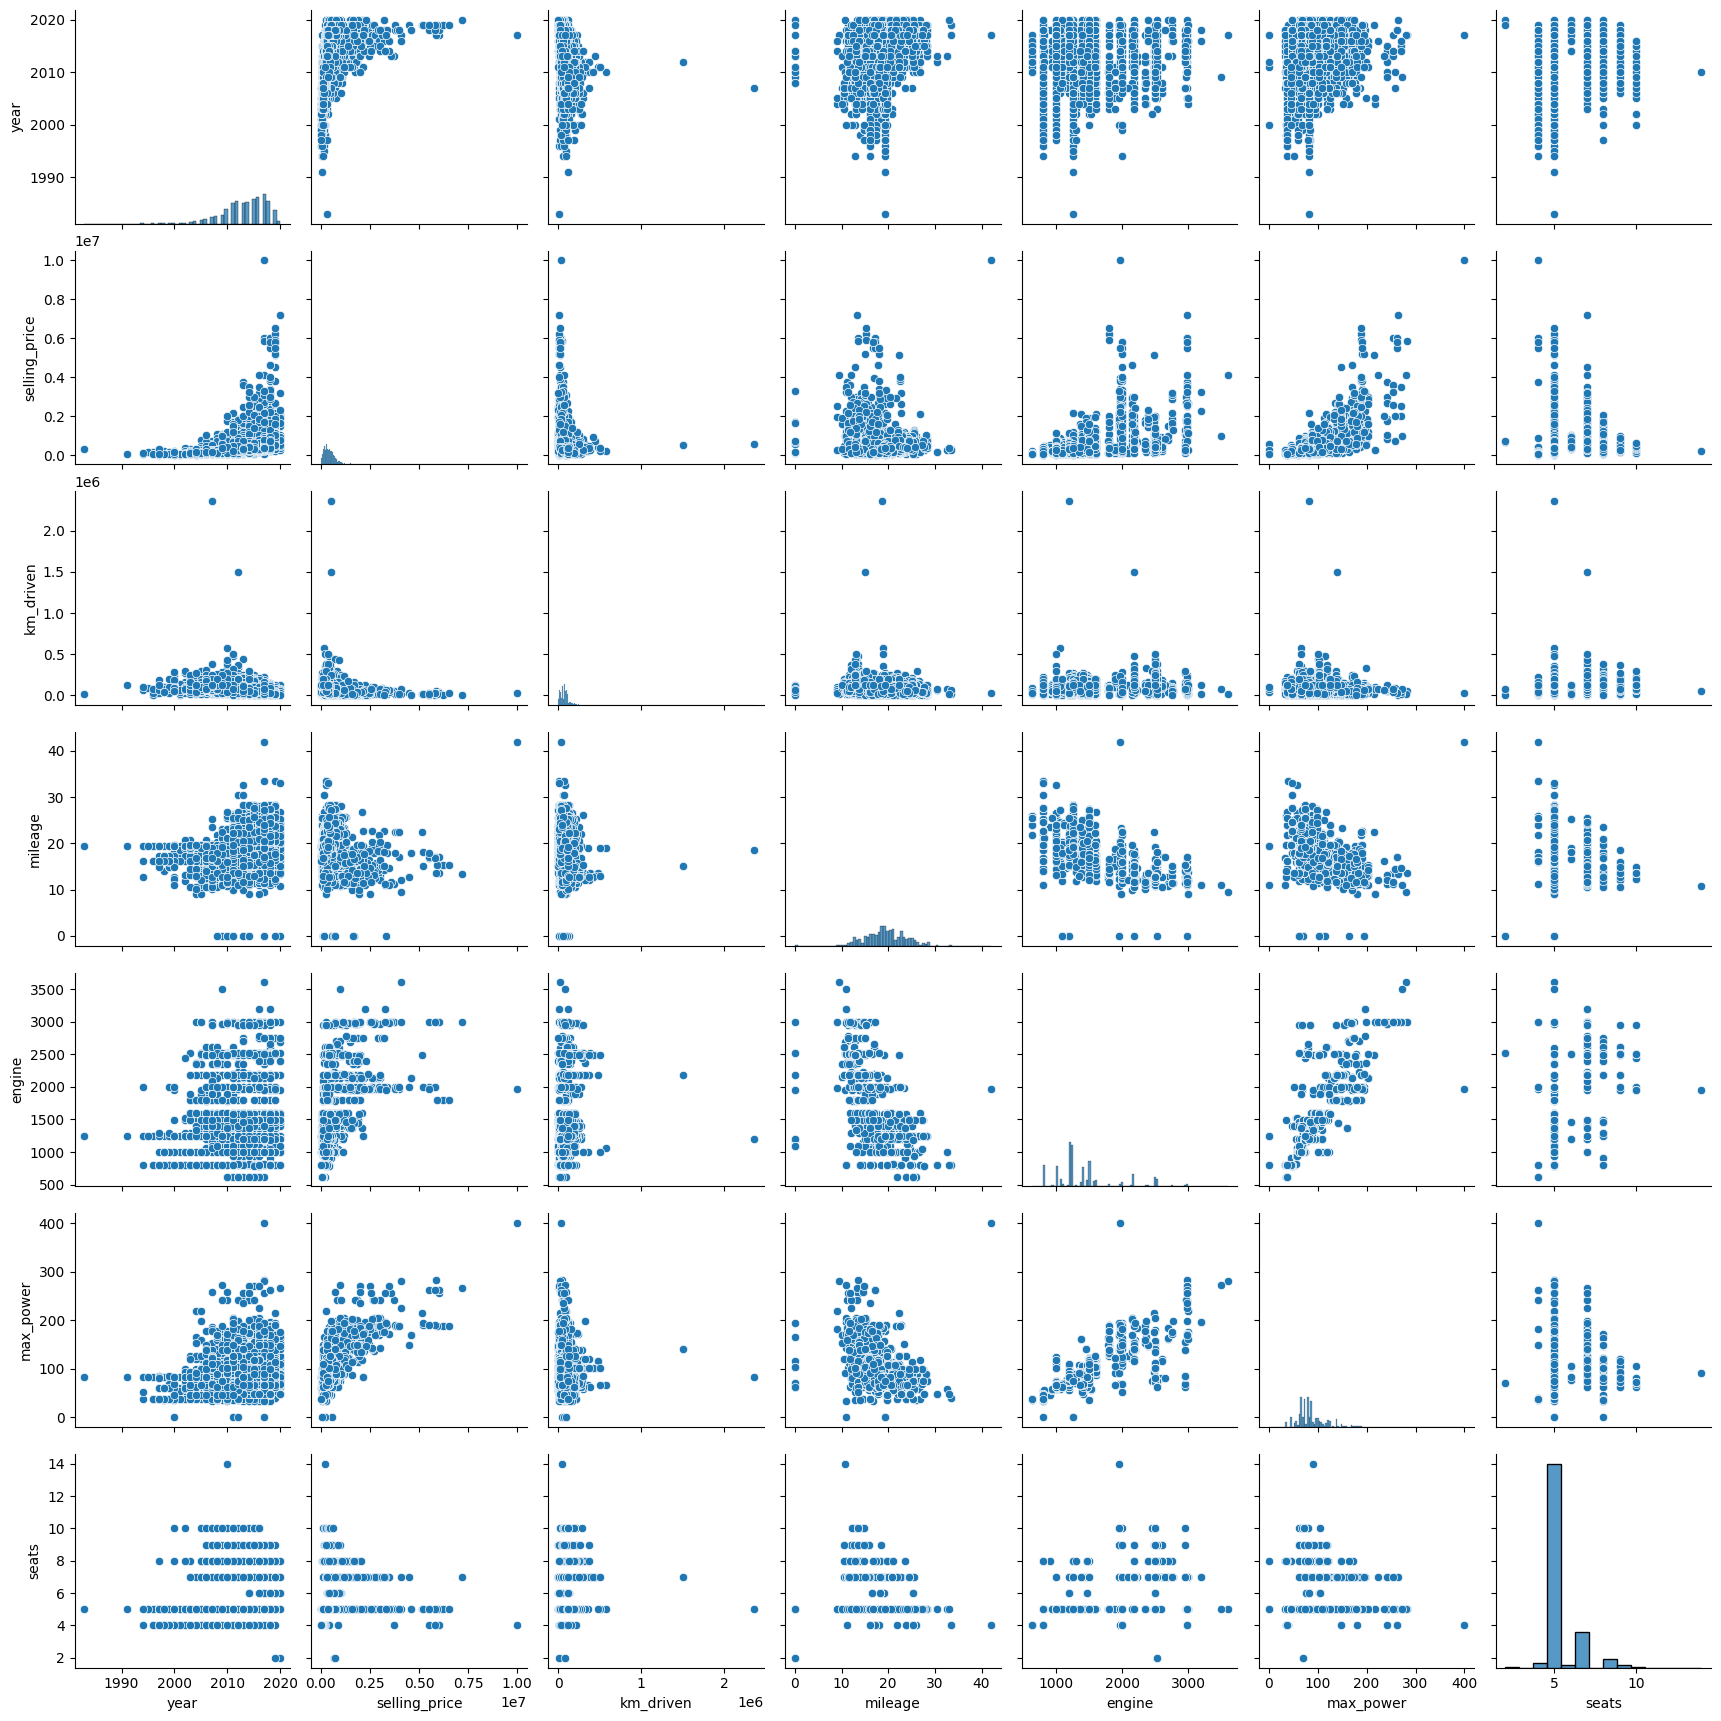

In [335]:
# your code here
sns.pairplot(df_train[num_features])

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

1. Есть признаки демонстрирующие линейную зависимость с целевой переменной
2. Есть примеры коррелирующих дркг с другом признаков

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

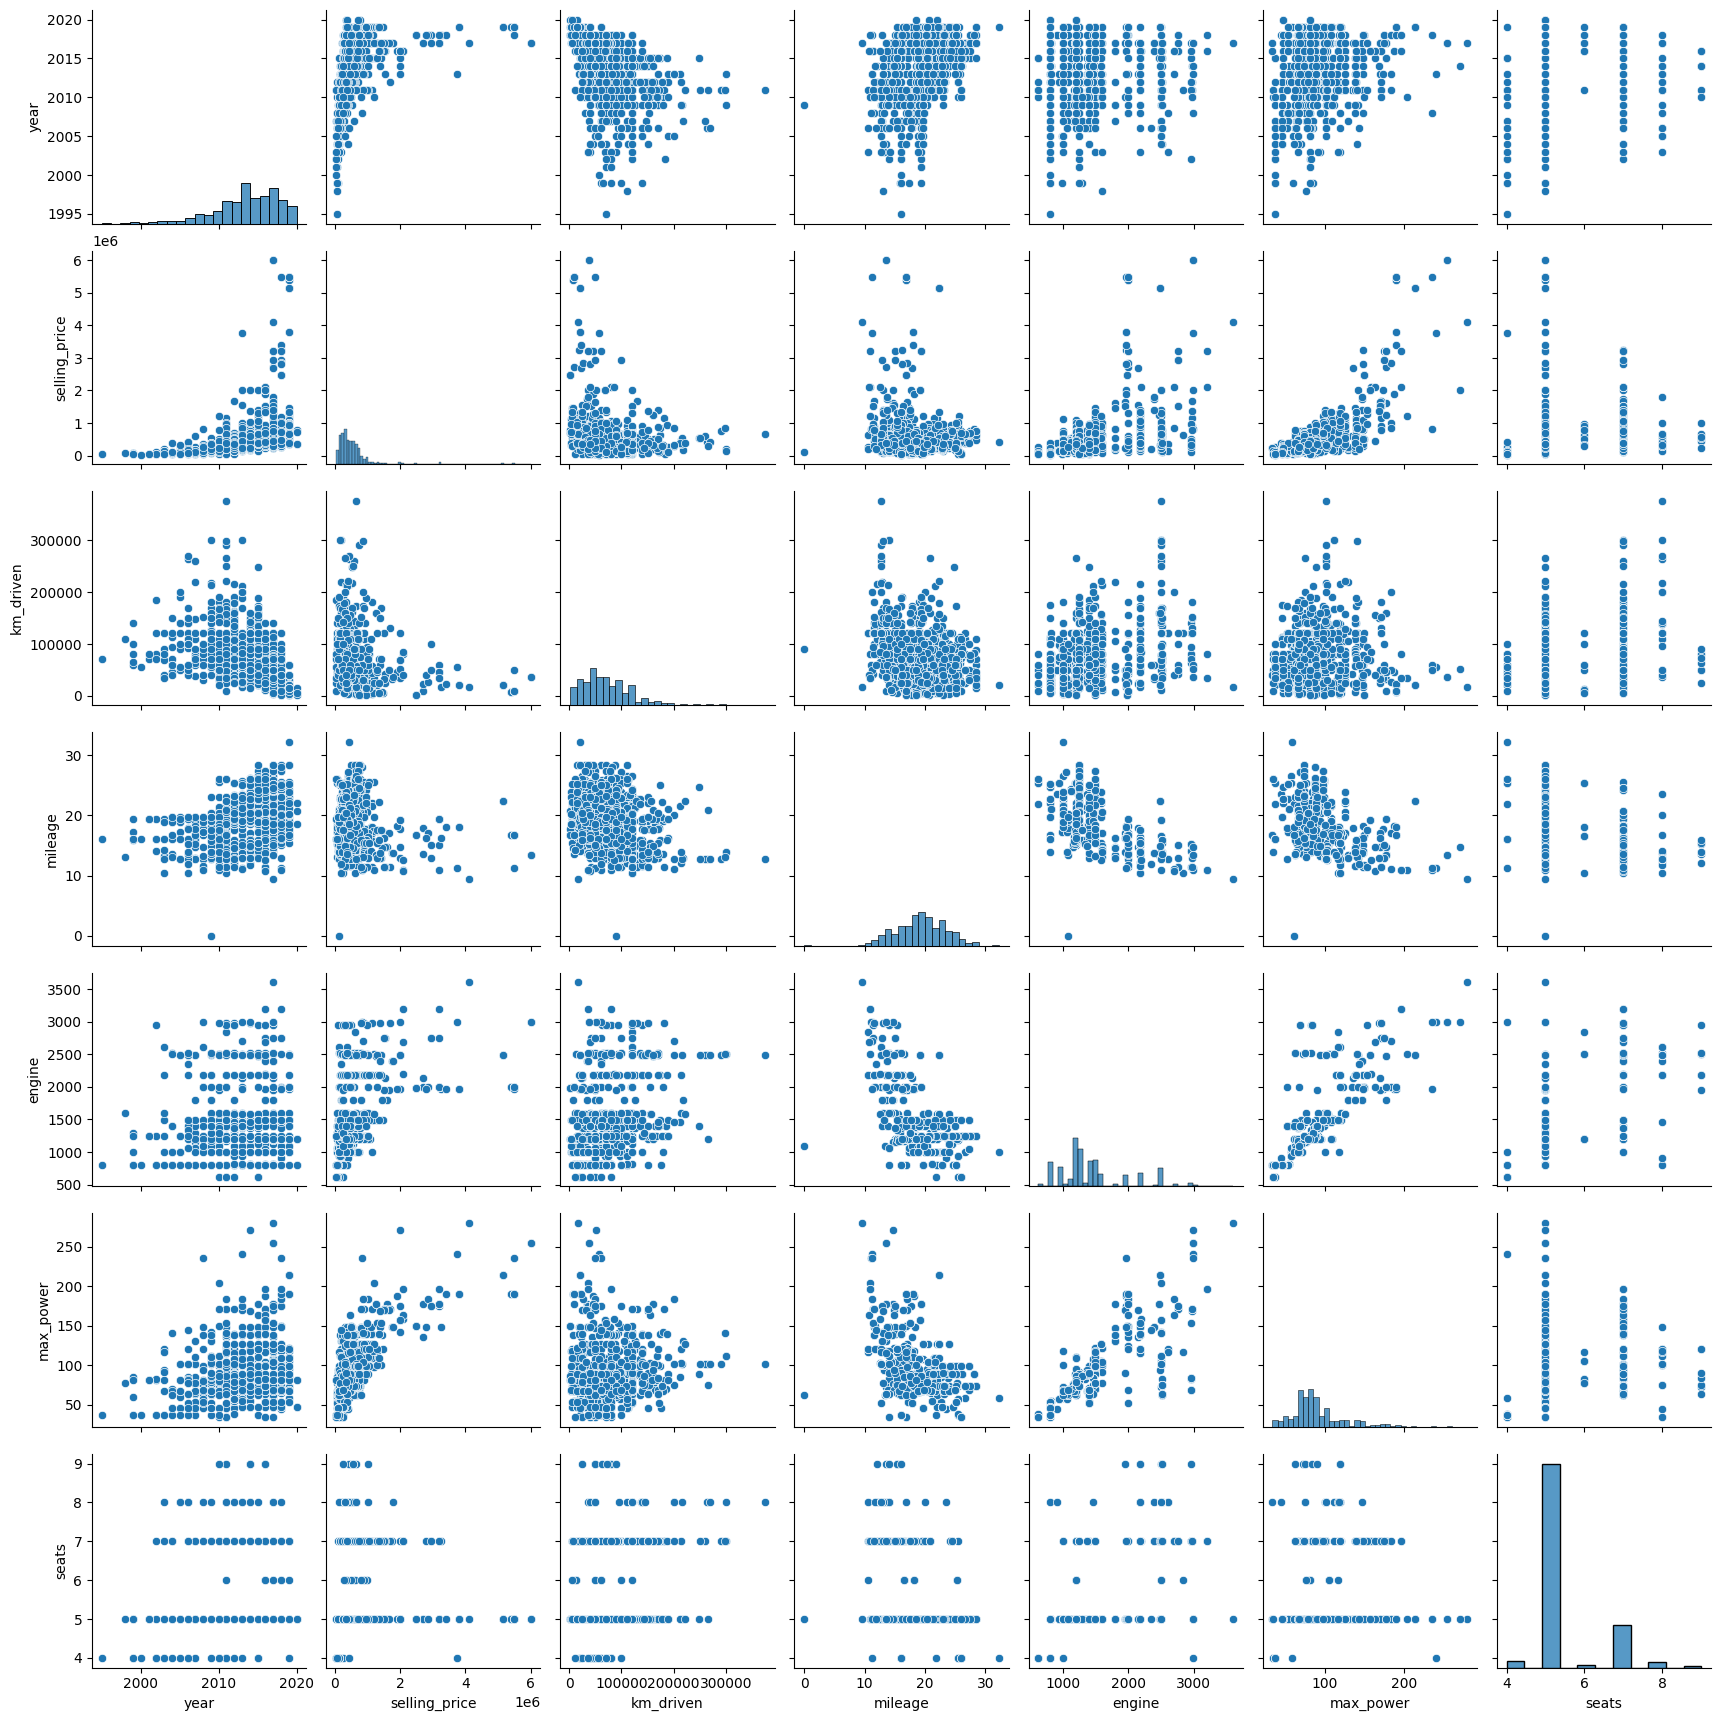

In [336]:
# your code here
sns.pairplot(df_test[num_features])

При разделении на трэйн и тест мы имеемсхожие на вид совокупности

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

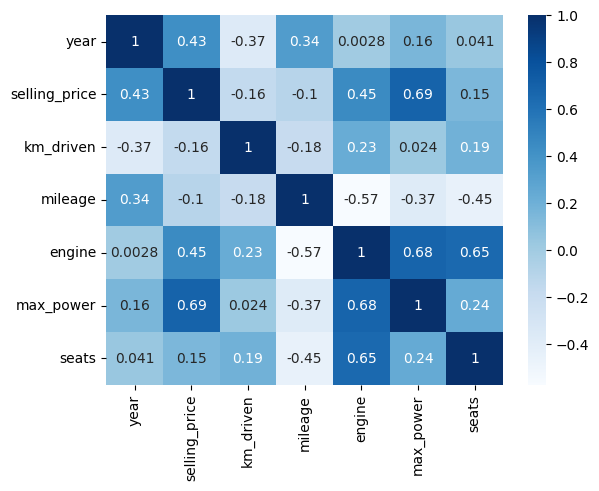

In [337]:
# your code here
corr = df_train[num_features].corr()
sns.heatmap(corr, cmap="Blues", annot=True);

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

1. Наименее скорелированны между собой признаки year и engine
2. Между признаком max_power и целевой переменной наиболее сильная линейная зависимость
во всей таблице. А если смотреть только на признаки, то наиболее сильная линейная зависимость между признаками: engine и max_power
3. Да

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

Text(0, 0.5, 'max_power')

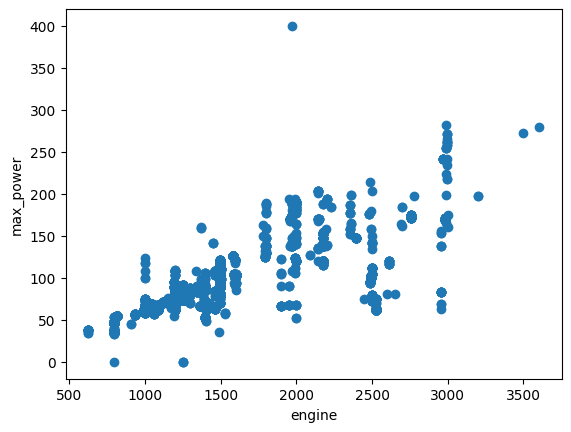

In [338]:
# your code here
plt.scatter(df_train['engine'], df_train['max_power'])
plt.xlabel('engine')
plt.ylabel('max_power')

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [339]:
# your code here


# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [340]:
# получим только вещественные признаки
num_features = df_train.describe().columns.to_list()

In [341]:
y_train = df_train["selling_price"]  # your code here
X_train = df_train[num_features].drop(columns=["selling_price"])  # your code here

In [342]:
assert X_train.shape == (5840, 6)

In [343]:
y_test = df_test["selling_price"]  # your code here
X_test = df_test[num_features].drop(columns=["selling_price"])  # your code here

In [344]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [345]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(f"r2_score: {r2_score(y_test, preds)}")
print(f"MSE: {MSE(y_test, preds)}")

r2_score: 0.5937024338674357
MSE: 233551443099.39725


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [346]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

model = LinearRegression()
model.fit(X_train_norm, y_train)
preds = model.predict(X_test_norm)
print(f"r2_score: {r2_score(y_test, preds)}")
print(f"MSE: {MSE(y_test, preds)}")

r2_score: 0.5937024338674468
MSE: 233551443099.39087


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [347]:
# your code here
print(f"Наиболее информативный признак - {num_features[np.argmax(model.coef_)]}")

Наиболее информативный признак - engine


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [348]:
from sklearn.linear_model import Lasso

# your code here
model = Lasso()
model.fit(X_train_norm, y_train)
preds = model.predict(X_test_norm)
print(f"r2_score: {r2_score(y_test, preds)}")
print(f"MSE: {MSE(y_test, preds)}")

r2_score: 0.5937012618474564
MSE: 233552116809.94913


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [349]:
# your code here
model.coef_

array([152413.608387  , -44298.50504536,  28482.03984137,  60666.793474  ,
       322578.50839763, -22509.71482318])

Скорее всего дело в том, что дефолтное значени alpha == 1(константа, отвечающая за силу регуляризации)
слишком маленькое для данной задачи

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [350]:
from sklearn.model_selection import GridSearchCV
from time import time

# your code here
parameters = {
    "alpha": [0.5, 1, 5, 10, 25, 50, 100, 1000, 10000, 100000],
    "tol": [1e-4, 1e-6],
    "warm_start": [False, True],
    "selection": ["cyclic", "random"]
}

model = Lasso()
reg = GridSearchCV(model, parameters, verbose=1)

start_t = time()
reg.fit(X_train_norm, y_train)
res_t = time() - start_t

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [351]:
reg.best_estimator_

Lasso(alpha=10000, selection='random')

In [352]:
reg.best_score_

0.5801666340485964

Получим результаты на тестовом наборе данных

In [353]:
reg_model = reg.best_estimator_
preds = reg_model.predict(X_test_norm)
print(f"r2_score: {r2_score(y_test, preds)}")
print(f"MSE: {MSE(y_test, preds)}")

r2_score: 0.5812196517619186
MSE: 240726902707.46112


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [354]:
# your code here
print(f"Время обучения модели грид-серчем - {res_t} сек")

Время обучения модели грид-серчем - 2.5503170490264893 сек


In [355]:
print(f"Лучший коэффициент регуляризации: {reg_model.get_params()['alpha']}")

Лучший коэффициент регуляризации: 10000


In [356]:
reg_model.coef_

array([151552.06658288, -32878.31029412,   8881.07393369,  18073.61705628,
       328693.26799386,     -0.        ])

In [357]:
print(f"Занулились ли какие-нибудь веса - {'Да' if sum(reg_model.coef_ == 0) > 0 else 'Нет'}")

Занулились ли какие-нибудь веса - Да


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [358]:
from sklearn.linear_model import ElasticNet

# your code here
parameters = {
    "alpha": [0.5, 1, 5, 10, 25, 50, 100, 1000, 10000, 100000],
    "l1_ratio": [0.3, 0.5, 0.7],
    "tol": [1e-4, 1e-6],
    "warm_start": [False, True],
    "selection": ["cyclic", "random"],
    "positive": [False, True]
}

model = ElasticNet()
reg = GridSearchCV(model, parameters, verbose=1)

reg.fit(X_train_norm, y_train)
reg_model = reg.best_estimator_
preds = reg_model.predict(X_test_norm)
print(f"r2_score: {r2_score(y_test, preds)}")
print(f"MSE: {MSE(y_test, preds)}")


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


r2_score: 0.5610652567113739
MSE: 252312224504.13232


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [359]:
# your code here
print("Гиперпараметры лучшей модели")
reg.best_params_

Гиперпараметры лучшей модели


{'alpha': 0.5,
 'l1_ratio': 0.7,
 'positive': False,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [360]:
df_train.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74.0,5


In [361]:
# your code here
y_train = df_train.selling_price
X_train_cat = df_train.drop(columns=["name", "selling_price"])
y_test = df_test.selling_price
X_test_cat = df_test.drop(columns=["name", "selling_price"])

In [362]:
assert X_train_cat.shape == (5840, 10)

In [363]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [364]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here
cat_columns = X_train_cat.describe(include='object').columns.to_list() + ["seats"]
num_columns = X_train_cat.drop(columns=["seats"]).describe().columns.to_list()
X_train_cat["seats"] = X_train_cat["seats"].astype(str)
X_test_cat["seats"] = X_test_cat["seats"].astype(str)
X_test_dummies = pd.get_dummies(X_test_cat[cat_columns], drop_first=True).astype(int)
X_train_dummies = pd.get_dummies(X_train_cat[cat_columns], drop_first=True).astype(int)

X_train_cat.drop(columns=cat_columns, inplace=True)
X_test_cat.drop(columns=cat_columns, inplace=True)

In [365]:
X_train_num = X_train_cat[num_columns]
X_test_num = X_test_cat[num_columns]

sc = StandardScaler()
X_train_num_norm = sc.fit_transform(X_train_num)
X_test_num_norm = sc.transform(X_test_num)

In [366]:
# X_train_cat = pd.concat([X_train_cat, X_train_dummies], axis=1)
# X_test_cat = pd.concat([X_test_cat, X_test_dummies], axis=1)

In [367]:
in_test_out_cols = list(set(X_train_dummies.columns) - set(X_test_dummies.columns))
in_test_out_cols

['seats_14', 'seats_2', 'seats_4']

In [368]:
out_cols_df = pd.DataFrame({
    item: np.zeros(len(X_test_cat)).astype(int) for item in in_test_out_cols
})
X_test_dummies = pd.concat([X_test_dummies, out_cols_df], axis=1)
list(set(X_train_dummies.columns) - set(X_test_dummies.columns))

[]

In [369]:
res_cat_features = X_train_dummies.columns

In [370]:
X_test_dummies = X_test_dummies[res_cat_features]

Объединим отмасштабированные числовые фичи и ктегориальные

In [371]:
X_train_np = np.concatenate([X_train_num_norm, X_train_dummies.to_numpy()], axis=1)
X_test_np = np.concatenate([X_test_num_norm, X_test_dummies.to_numpy()], axis=1)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [372]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here
parameters = {
    "alpha": [0.5, 1, 5, 25, 50, 100],
    "tol": [1e-4],
    "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"],
    "max_iter": [20000]
}

model = Ridge()
reg = GridSearchCV(model, parameters, verbose=2, scoring="r2", cv=10)

reg.fit(X_train_np, y_train)
reg_model = reg.best_estimator_
preds = reg_model.predict(X_test_np)
print(f"r2_score: {r2_score(y_test, preds)}")
print(f"MSE: {MSE(y_test, preds)}")

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END .alpha=0.5, max_iter=20000, solver=auto, tol=0.0001; total time=   0.0s
[CV] END .alpha=0.5, max_iter=20000, solver=auto, tol=0.0001; total time=   0.0s
[CV] END .alpha=0.5, max_iter=20000, solver=auto, tol=0.0001; total time=   0.0s
[CV] END .alpha=0.5, max_iter=20000, solver=auto, tol=0.0001; total time=   0.0s
[CV] END .alpha=0.5, max_iter=20000, solver=auto, tol=0.0001; total time=   0.0s
[CV] END ..alpha=0.5, max_iter=20000, solver=svd, tol=0.0001; total time=   0.0s
[CV] END ..alpha=0.5, max_iter=20000, solver=svd, tol=0.0001; total time=   0.0s
[CV] END ..alpha=0.5, max_iter=20000, solver=svd, tol=0.0001; total time=   0.0s
[CV] END ..alpha=0.5, max_iter=20000, solver=svd, tol=0.0001; total time=   0.0s
[CV] END ..alpha=0.5, max_iter=20000, solver=svd, tol=0.0001; total time=   0.0s
[CV] END alpha=0.5, max_iter=20000, solver=cholesky, tol=0.0001; total time=   0.0s
[CV] END alpha=0.5, max_iter=20000, solver=c

In [375]:
reg_model.get_params()

{'alpha': 5,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 20000,
 'positive': False,
 'random_state': None,
 'solver': 'lsqr',
 'tol': 0.0001}

Получилось улучшить результаты

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [402]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

df_train.sample(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6305,Maruti Vitara Brezza VDi,2016,750000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
3651,Hyundai Grand i10 1.2 CRDi Sportz,2017,450000,56290,Diesel,Dealer,Manual,First Owner,24.0 kmpl,1186 CC,73.97 bhp,190.24nm@ 1750-2250rpm,5.0


In [403]:
# удалим дубликаты
y_train = df_train[["selling_price"]]
y_test = df_test[["selling_price"]]

df_train.drop(columns=["selling_price"], inplace=True)
df_test.drop(columns=["selling_price"], inplace=True)

df_train.drop_duplicates(keep="first", inplace=True)
y_train = y_train.loc[df_train.index]
df_train.index = list(range(len(df_train)))
y_train.index = list(range(len(df_train)))

df_test.drop_duplicates(keep="first", inplace=True)
y_test = y_test.loc[df_test.index]
df_test.index = list(range(len(df_test)))
y_test.index = list(range(len(df_test)))

In [404]:
# удаляем torque
df_train.drop(columns=["torque"], inplace=True)
df_test.drop(columns=["torque"], inplace=True)

In [405]:
# преобразуем столбец name

premium_marks = ["mercedes-benz", "bmw", "audi", "volvo", "jaguar", "land", "lexus"]

df_train["name"] = df_train["name"].map(lambda x: 1 if (x.split(" ")[0]).lower() in premium_marks else 0)
df_test["name"] = df_test["name"].map(lambda x: 1 if (x.split(" ")[0]).lower() in premium_marks else 0)

In [406]:
# квадрат года
df_train["year"] = df_train["year"].map(lambda x: x ** 2)
df_test["year"] = df_test["year"].map(lambda x: x ** 2)

In [407]:
# прологарифмируем целевую переменную
y_train["selling_price"] = y_train["selling_price"].map(lambda x: np.log(x + 1))
y_test["selling_price"] = y_test["selling_price"].map(lambda x: np.log(x + 1))

In [408]:
# преобразуем ряд категориальных фичей в вещественные
get_val_func = lambda x: 0.0 if str(x).split(" ")[0] == "" else float(str(x).split(" ")[0])

def preproc_func(df: pd.DataFrame, columns=["mileage", "engine", "max_power"]) -> pd.DataFrame:
    for col in columns:
        df[col] = df[col].apply(get_val_func)
    return df

df_train = preproc_func(df_train)
df_test = preproc_func(df_test)

In [409]:
mileage_m = df_train.mileage.median()
engine_m = df_train.engine.median()
max_power_m = df_train.max_power.median()
seats_m = df_train.seats.median()

df_train["mileage"].fillna(mileage_m, inplace=True)
df_train["engine"].fillna(engine_m, inplace=True)
df_train["max_power"].fillna(max_power_m, inplace=True)
df_train["seats"].fillna(seats_m, inplace=True)
df_test["mileage"].fillna(mileage_m, inplace=True)
df_test["engine"].fillna(engine_m, inplace=True)
df_test["max_power"].fillna(max_power_m, inplace=True)
df_test["seats"].fillna(seats_m, inplace=True);

In [410]:
# seats сделаем категориальным
df_train["seats"] = df_train["seats"].map(lambda x: str(int(x)))
df_test["seats"] = df_test["seats"].map(lambda x: str(int(x)))

In [443]:
df_train.sample(5)  

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
79,0,4048144,28000,Petrol,Dealer,Manual,First Owner,19.81,1086.0,68.05,5
5744,0,4072324,70000,Diesel,Individual,Manual,First Owner,22.00,1582.0,126.20,5
4367,0,4044121,90000,Petrol,Individual,Manual,Second Owner,18.06,1198.0,75.00,5
5536,0,4072324,50000,Petrol,Individual,Manual,First Owner,22.70,799.0,53.64,5
1204,0,4048144,119000,Diesel,Individual,Manual,First Owner,14.00,2489.0,95.00,8


In [412]:
# получим списки категориальных и числовых фич
num_lst = ["year", "km_driven", "mileage", "engine", "max_power"]
cat_lst = ["fuel", "seller_type", "transmission", "owner", "seats"]
cat_lst_final = ["name"]

In [413]:
import pickle

# отмасштабируем числовые
sc = StandardScaler()

X_train_num = df_train[num_lst]
X_train_num = sc.fit_transform(X_train_num)
X_test_num = df_test[num_lst]
X_test_num = sc.transform(X_test_num)

pickle.dump(sc, open("scaler.pickle", 'wb'))

In [416]:
#one-hot encoding
X_test_dummies = pd.get_dummies(df_test[cat_lst], drop_first=True).astype(int)
X_train_dummies = pd.get_dummies(df_train[cat_lst], drop_first=True).astype(int)

in_test_out_cols = list(set(X_train_dummies.columns) - set(X_test_dummies.columns))

In [417]:
in_test_out_cols

['seats_14', 'seats_2', 'seats_4']

In [418]:
out_cols_df = pd.DataFrame({
    item: np.zeros(len(X_test_dummies)).astype(int) for item in in_test_out_cols
})
X_test_dummies = pd.concat([df_test[cat_lst_final], X_test_dummies, out_cols_df], axis=1)
X_train_dummies = pd.concat([df_train[cat_lst_final], X_train_dummies], axis=1)
list(set(X_train_dummies.columns) - set(X_test_dummies.columns))

[]

In [419]:
res_cat_features = X_train_dummies.columns
X_test_dummies = X_test_dummies[res_cat_features]

In [420]:
# порядок фич следующий
print(num_lst)
print(res_cat_features)

['year', 'km_driven', 'mileage', 'engine', 'max_power']
Index(['name', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner',
       'seats_14', 'seats_2', 'seats_4', 'seats_5', 'seats_6', 'seats_7',
       'seats_8', 'seats_9'],
      dtype='object')


In [421]:
# Объединяем числовые и категориальные данные
X_train_np = np.concatenate([X_train_num, X_train_dummies.to_numpy()], axis=1)
X_test_np = np.concatenate([X_test_num, X_test_dummies.to_numpy()], axis=1)

In [422]:
# обучаем модель
parameters = {
    "alpha": [0.5, 1, 5, 25, 50, 100],
    "tol": [1e-4],
    "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"],
    "max_iter": [20000]
}

model = Ridge()
reg = GridSearchCV(model, parameters, verbose=2, scoring="r2")

reg.fit(X_train_np, y_train.to_numpy())
reg_model = reg.best_estimator_
preds = reg_model.predict(X_test_np)
print(f"r2_score: {r2_score(y_test.to_numpy(), preds)}")

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END .alpha=0.5, max_iter=20000, solver=auto, tol=0.0001; total time=   0.0s
[CV] END .alpha=0.5, max_iter=20000, solver=auto, tol=0.0001; total time=   0.0s
[CV] END .alpha=0.5, max_iter=20000, solver=auto, tol=0.0001; total time=   0.0s
[CV] END .alpha=0.5, max_iter=20000, solver=auto, tol=0.0001; total time=   0.0s
[CV] END .alpha=0.5, max_iter=20000, solver=auto, tol=0.0001; total time=   0.0s
[CV] END ..alpha=0.5, max_iter=20000, solver=svd, tol=0.0001; total time=   0.0s
[CV] END ..alpha=0.5, max_iter=20000, solver=svd, tol=0.0001; total time=   0.0s
[CV] END ..alpha=0.5, max_iter=20000, solver=svd, tol=0.0001; total time=   0.0s
[CV] END ..alpha=0.5, max_iter=20000, solver=svd, tol=0.0001; total time=   0.0s
[CV] END ..alpha=0.5, max_iter=20000, solver=svd, tol=0.0001; total time=   0.0s
[CV] END alpha=0.5, max_iter=20000, solver=cholesky, tol=0.0001; total time=   0.0s
[CV] END alpha=0.5, max_iter=20000, solver=c

In [439]:
def f(x):
    return np.exp(x) - 1

In [440]:
print(f"r2_score: {r2_score(f(y_test.to_numpy()), f(preds))}")

r2_score: 0.8714687881119664


In [441]:
pickle.dump(reg_model, open("model.pickle", 'wb'))

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [442]:
def business_metrics(y_true, y_pred):
    return sum(np.abs(y_pred / y_true - 1) <= 0.1) / len(y_true)

business_metrics(f(y_test.to_numpy()), f(preds))

array([0.28141783])

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link